In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from matplotlib import pyplot as plt
from scipy import stats

/Users/andreysemeshin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

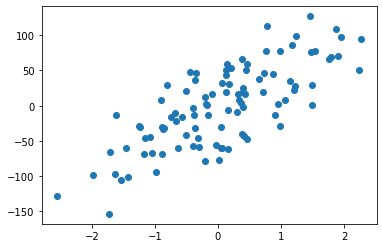

In [12]:
# посмотрим что получилось

pylab.plot(x, y, 'o')
pylab.show()

In [13]:
# размер данных

m, n = np.shape(x)
m, n

(100, 1)

In [14]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[ 1.        , -0.35955316],
       [ 1.        ,  0.97663904],
       [ 1.        ,  0.40234164],
       [ 1.        , -0.81314628],
       [ 1.        , -0.88778575]])

In [15]:
# y лист значений
y[:5]

array([-31.74599395, -28.79914206,  -2.18450294,  28.96679712,
       -30.8791169 ])

### Сначала вручную

In [18]:
# шаг алгоритма
alpha = 0.01

In [21]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь, функция качества модели
        
        #print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
        
    return theta

GRADIENT = (X_T * веса) / количество_данных

1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4

1 1 1 1 1 1 1 1 1 1 1 1    0.4
2 2 2 2 2 2 2 2 2 2 2 2    0.334
3 3 3 3 3 3 3 3 3 3 3 3    0.34
4 4 4 4 4 4 4 4 4 4 4 4    0.23


In [24]:
%%time
theta = gradient_descent_2(alpha, x, y, 1000)

CPU times: user 26.9 ms, sys: 1.24 ms, total: 28.1 ms
Wall time: 28.5 ms


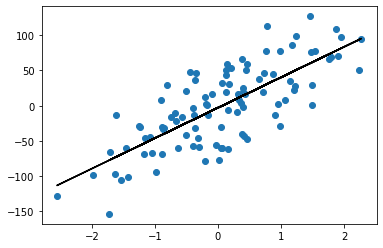

In [25]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    
# рисуем результат
pylab.plot(x[:,1],y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()

In [ ]:
x.shape[1]

In [23]:
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    print(theta[0],theta[1], y_predict)

NameError: name 'theta' is not defined

### Используем готовые методы

In [14]:
from sklearn import linear_model

In [15]:
model = linear_model.SGDRegressor( alpha = 0.01, max_iter = 1000 )

In [16]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

In [17]:
%%time 

model.fit( x, y )

CPU times: user 1.49 ms, sys: 631 µs, total: 2.12 ms
Wall time: 1.42 ms


SGDRegressor(alpha=0.01)

In [18]:
model.intercept_, model.coef_

(array([-2.78445801]), array([42.77013704]))

In [19]:
y_predict_sgd = model.predict( x )

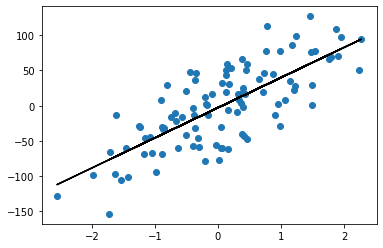

In [20]:
pylab.plot(x, y, 'o')
pylab.plot(x, y_predict_sgd, 'k-')
pylab.show()

Градиентный спуск логистической регрессии
==========

Дата сет для классификации

In [26]:
from sklearn.datasets import make_blobs

In [27]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
X.shape, y.shape

((100, 2), (100,))

In [28]:
X[:5]

array([[-0.79415228,  2.10495117],
       [-9.15155186, -4.81286449],
       [-3.10367371,  3.90202401],
       [-1.42946517,  5.16850105],
       [-7.4693868 , -4.20198333]])

In [29]:
y[:5]

array([0, 1, 0, 0, 1])

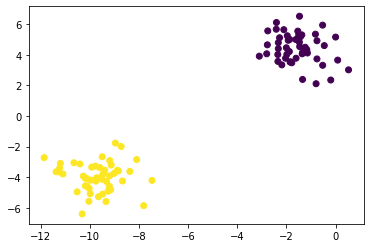

In [32]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y[:])
plt.show()

In [17]:
def gradient_descent_log_reg(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска для логистической регрессии
    """
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis_prim = np.dot(x, theta) # матричное произведение
        loss = 0
        for i in hypothesis_prim:
            hypothesis_sec = 1.0/(1.0 + np.exp((-1)*i))
            loss += hypothesis_sec - y
        J = np.sum(loss ** 2)
        gradient = (1.0/m) * np.dot(x_transpose, loss)
        theta = theta - alpha * gradient
        
    return theta

In [18]:
%%time
alpha = 0.0001
theta = gradient_descent_log_reg(alpha, X, y, 1000)

CPU times: user 1.04 s, sys: 9.61 ms, total: 1.05 s
Wall time: 1.04 s


In [19]:
theta

array([-19.12706575, -20.00193801])

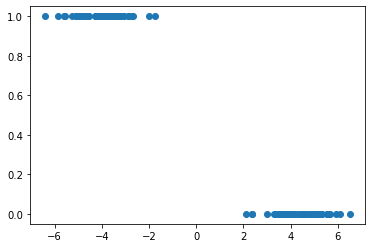

In [20]:
y_pred = []
for i in X:
    y_pred.append(int(round(1/(1+np.exp(-1*(theta[0] + theta[1]*i[1]))),0)))
plt.plot(X[:,1],y_pred,'o')
plt.show()

In [21]:
df = pd.DataFrame({'y_origin': y, 'y_predicted': np.array(y_pred)}, columns=['y_origin','y_predicted'])
df.head(10)

,y_origin,y_predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


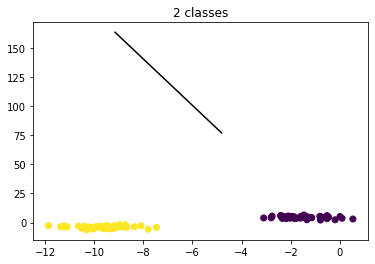

In [22]:
for i in range(X.shape[0]):
    y_predict =  theta[0] + theta[1]*X[1]
    

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('2 classes')
pylab.plot(X[1],y_predict,'k-')
pylab.show()

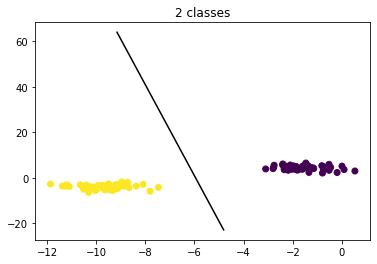

In [23]:
# добавил смещение по оси y
for i in range(X.shape[0]):
    y_predict =  theta[0] + theta[1]*X[1]-100
    

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('2 classes')
pylab.plot(X[1],y_predict,'k-')
pylab.show()

Готовый метод из sklearn
========

In [118]:
model_reg = linear_model.SGDRegressor(alpha = 0.000001, max_iter = 1000)

In [120]:
model_reg.fit(X, y)

SGDRegressor(alpha=1e-06)

In [121]:
model_reg.intercept_, model_reg.coef_

(array([0.01607418]), array([-0.08604271, -0.03505761]))

In [122]:
y_predict_sgd = model_reg.predict(X)

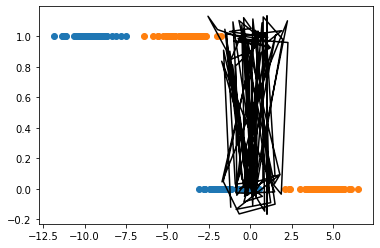

In [124]:
pylab.plot(X, y, 'o')
pylab.plot(x, y_predict_sgd, 'k-')
pylab.show()

In [126]:
model_reg = linear_model.SGDRegressor(alpha = 0.000001, max_iter = 1000)

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [130]:
model_reg.fit(X_train, y_train)

SGDRegressor(alpha=1e-06)

In [136]:
model_reg.predict(X_test)

array([-0.18875229,  1.16873391,  0.00169965,  0.9289276 , -0.02093245,
       -0.12478941, -0.0747563 ,  1.1333373 ,  0.95029718,  0.88947793,
        0.9861076 , -0.14934732, -0.11492117,  0.86710179, -0.1737343 ,
        1.00854276,  1.04496448, -0.02672799, -0.04967229,  0.07891142,
        0.07336446,  0.97301734, -0.06346314,  1.12992335, -0.13626623,
        1.15730102,  1.03486389, -0.01696587,  1.02318277,  0.93074766])

In [138]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1])